<a href="https://colab.research.google.com/github/GabyPugaBR/AAI2025/blob/main/CodingExtraCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Coding Exercise - ML Basics**

---

**Extra Credit** \
Develop a simple AI-powered demand housing price forecasting tool using Python that reads historical sales or inventory data from a CSV file and predicts demand for the next 6 months using a basic machine learning model.



**Requirements:**

*   Load and preprocess the dataset using pandas.
*   Implement a regression model (e.g., Linear Regression) from scikit-learn.
*   Forecast demand for future months and visualize the results using matplotlib.
*   Document assumptions, challenges, and potential improvements.


   year      SalePrice
0  2006  506599.666096
1  2007  561296.012987
2  2008  531625.974947
3  2009  471975.035676
4  2010  477933.112800
5  2011  445351.177778
6  2012  439313.787788
7  2013  506965.597911
8  2014  468093.174672
9  2015  361689.564103


Month House Price Forecast:
January: $512,408.49
February: $513,075.87
March: $513,743.25
April: $514,410.63
May: $515,078.00
June: $515,745.38


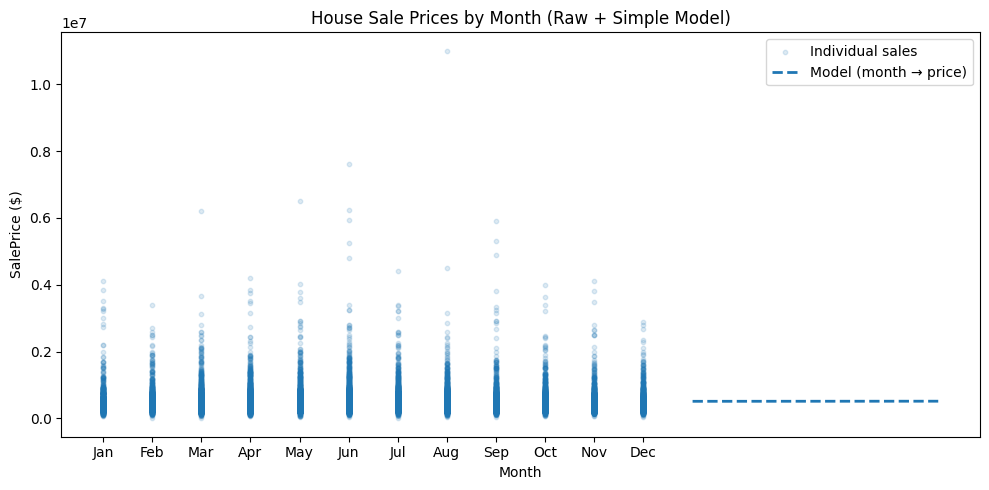

In [18]:
import pandas as pd
import calendar
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/house_sales.csv')
# df.columns
# df.info()
# df.head(10)
df['ym'] = pd.to_datetime(df['ym'])
df['year'] = df['ym'].dt.year
yearly_avg = df.groupby('year')['SalePrice'].mean().reset_index()
print(yearly_avg)


# Transform 'ym' to 'month' and remove extra columns
df['month'] = pd.to_datetime(df['ym']).dt.month
df = df[['month', 'SalePrice']]
# df

# Ensure columns: 'month', 'sales'(mine is SalePrice)
X = df[['month']]
y = df['SalePrice']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for next 6 months
future_months = pd.DataFrame({'month': range(max(df['month'])+1, max(df['month'])+7)})
predictions = model.predict(future_months)

#Below with help assistance from ChatGPT

# Display predictions with month names
print()
print()
print("Month House Price Forecast:")
for month_num, pred in zip(future_months['month'], predictions):
    actual_month = ((month_num - 1) % 12) + 1
    month_name = calendar.month_name[actual_month]
    print(f"{month_name}: ${pred:,.2f}")

# # Plot results
# plt.plot(df['month'], y, label='Historical Sales')
# plt.plot(future_months['month'], predictions, label='Predicted Sales', linestyle='--')
# plt.xlabel('Month')
# plt.ylabel('SalePrice')
# plt.legend()
# plt.show()

# Plot
plt.figure(figsize=(10, 5))

# Raw data as scatter (faint)
plt.scatter(df['month'], df['SalePrice'], alpha=0.15, s=10, label='Individual sales')

# Regression line across months
plt.plot(future_months['month'], predictions, linestyle='--', linewidth=2, label='Model (month → price)')

plt.xticks(range(1, 13), [calendar.month_abbr[m] for m in range(1, 13)])
plt.xlabel('Month')
plt.ylabel('SalePrice ($)')
plt.title('House Sale Prices by Month (Raw + Simple Model)')
plt.legend()
plt.tight_layout()
plt.show()

**The model is limited because it only uses month as a predictor, which captures seasonality but ignores long-term market trends. Since the dataset spans 10 years with clear price fluctuations, we’re missing macroeconomic and time-based effects. One possible improvement would be to include a time index or additional variables like year or economic indicators to better model overall price movement.**